In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**Question 1**

Begin by defining $\Omega$ to be the solid angle subtended by the stars at a particular distance from the origin, $r$. As there are $4\pi$ steradians in a sphere, we must find $r'$ such that $\int_{0}^{r'} \Omega dr = 4\pi$. 

$\Omega$ is a function of the number of stars, their solid angle and their distance. Using the small angle approximation, we can write $\Omega dr = \frac{\pi*a^2}{4\pi r^2} dn$, where $a$ is the radius of the stars, $r$ is the distance to the star and $dn$ is the number of stars in a spherical shell of thickness $dr$. To calculate $dn$ we assume isotropy and homogeneity. Then the number of stars is simply the volume of a spherical shell of radius $r$, times the density of stars, $\rho$. Specifically: $dn = 4\pi r^2 \rho$. Substituting this into the expression above gives $\Omega dr = \pi a^2 \rho$

$\int_{0}^{r} \pi a^2 \rho = 4\pi \implies r = \frac{4}{a^2 \rho}$

The last consideration is our units. While $a$ has been given to us in meters, $\rho$ is given in megaparsecs, so a conversion must be performed to get the proper result.

In [25]:
s_density = 10e9
s_radius_m = 7e8
m_to_mpc = 3.2047e-23

r = 4/((s_radius_m * m_to_mpc)**2 * s_density)

print "The distance at which any line of sight intersects a star in this Obertian universe is", r, "Megaparsecs"

The distance at which any line of sight intersects a star in this Obertian universe is 7.94857269634e+17 Megaparsecs


**Question 2**

This one is nice and easy. Since Hubble's constant is simply $\frac{velocity}{distance}$, the error can be calculated through simple division.

Since Hubble's initial estimate of the age of the universe was too low it would imply that the universe had recently begun accelerating in expansion. This is because the Hubble time gives an estimate of the age of the universe by extrapolating the current rate of expansion back in time. Faster expansion implies a younger universe, so the universe must have been expaning slower in the past to have the proper age.

In [26]:
H0_incorrect = 500
H0_actual = 70

cepheid_distance_error = H0_incorrect / H0_actual

print "Hubble's estimates of Cepheid distances was too small by a factor of", cepheid_distance_error, ".\n"

km_per_mpc = 3.241e-20

H_time_incorrect = (1/(H0_incorrect * km_per_mpc))/(60*60*24*365*1e9)
H_time_actual = (1/(H0_actual * km_per_mpc))/(60*60*24*365*1e9)

print "The estimated age of the universe was", H_time_incorrect, "Gyrs instead of the proper estimate of",H_time_actual,"Gyrs."


Hubble's estimates of Cepheid distances was too small by a factor of 7 .

The estimated age of the universe was 1.95679061918 Gyrs instead of the proper estimate of 13.9770758513 Gyrs.


**Question 3**

The metric on a sphere is $ds^2 = dr^2 + R^2 sin^2(\frac{r}{R})d\theta^2$. For simplicity, assume the observer is at the origin of this coordinate system and one of the points lies on the prime meridian. The coordinates of the two points are then $(r,0)$ and $(r,d\theta)$. The metric above can be re-written to solve for $d\theta$ as such:

$d\theta = \sqrt{\frac{ds^2 - dr^2}{R^2 sin^2(r/R)}}$

In our case, $dr=0$ since the points are assumed to be equidistant, so the above equation reduces to:

$d\theta = \frac{ds}{R sin(\frac{r}{R})}$

As shown in the plot below, the angle subtended by the object approaches infinity at both very small r, and as r approaches $\pi r$. If you imagine the lines of sight coming from the origin and converging on the opposite pole, this makes sense.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


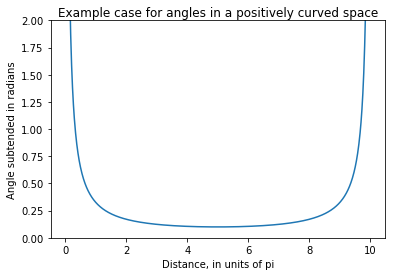

In [49]:
r_linspace = np.linspace(0,10*np.pi,1000)
def theta(r):
    return 1/(10*np.sin(r/10)) #0.1 and 100 were used as we assume ds<<R

plt.plot(r_linspace/np.pi, theta(r_linspace))
plt.xlabel("Distance, in units of pi")
plt.ylabel("Angle subtended in radians")
plt.title("Example case for angles in a positively curved space")
plt.ylim([0,2])
plt.show()

**Question 4**

To begin, this is the work to solve the integral exactly:

$\dot{a}^2 = H_0^2 a^{-3} \implies \frac{da}{dt} = H_0 a^{-\frac{3}{2}} \implies \int da * a^\frac{3}{2} = H_0 \int dt \implies \frac{2}{5} a^\frac{5}{2} = H_0 * t + C$

To solve for the constant of integration, we use the equalities $H_0 t_0 = 1$, and, $a(t_0) = 1$ (both by definition):

$\frac{2}{5} = 1 + C \implies -\frac{3}{5} = C $

Thus the exact solution is:

$ a = (\frac{5}{2} H_0 * t - \frac{3}{5})^\frac{2}{5} $

This is graphed as a line in the plot below, while scipy's numerical integration task odeint is used to make an estimate of the same relation using the differential formula for $\dot{a}$ above, and is graphed as points.

The range of t values is backwards because scipy needs the first value of the array to be the one for which initial conditions are defined. The "invalid value encountered in power" shows this simple model predicts non-real values for the scale factor prior to approximately 8.5 gigayears. Not the best model is it?

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in power


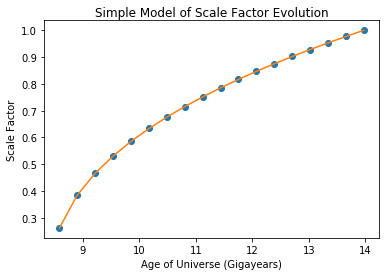

In [30]:
t_list = np.arange(4.407e17, 0,-1e16)
a_exact = (2.5*H0_actual*km_per_mpc*t_list - 1.5)**0.4

def adot(a,t0):
    return (70*3.241e-20)/(a**1.5)

solve = odeint(adot,1,t_list)

plt.plot(t_list/3.154e16,solve,marker='o',ls='')
plt.plot(t_list/3.154e16, a_exact)
plt.xlabel("Age of Universe (Gigayears)")
plt.ylabel("Scale Factor")
plt.title("Simple Model of Scale Factor Evolution")
plt.show()